# Fake News Detection 
https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset/data

# Rafiu Ali
rafiuali2002@gmail.com

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from collections import Counter

In [2]:
# Load datasets
fake_news = pd.read_csv(r"D:\Datascience jpy\Fake News detection dataset\Fake.csv")
true_news = pd.read_csv(r"D:\Datascience jpy\Fake News detection dataset\True.csv")

In [3]:
# Display first few rows of each dataset
print("First few rows of Fake News dataset:")
print(fake_news.head())

First few rows of Fake News dataset:
                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  


In [4]:
print("First few rows of True News dataset:")
print(true_news.head())

First few rows of True News dataset:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


In [5]:
# Display last few rows of each dataset
print("Last few rows of Fake News dataset:")
print(fake_news.tail())

Last few rows of Fake News dataset:
                                                   title  \
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                   date  
23476  January 16, 2016  
23477  January 16, 2016  
23478  January 15, 2016  
23479  January 14, 2016  
23480  January 12, 2016  


In [6]:
print("Last few rows of True News dataset:")
print(true_news.tail())

Last few rows of True News dataset:
                                                   title  \
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                   date  
21412  August 22, 2017   
21413  August 22, 2017   
21414  August 22, 2017   
21415  August 22, 2017   
21416  August 22, 2017   


In [24]:
#Shape of Fake News dataset
print("Shape of Fake News dataset:", fake_news.shape)


#Shape of True News datase 
print("Shape of True News dataset:", true_news.shape)

Shape of Fake News dataset: (23481, 5)
Shape of True News dataset: (21417, 5)


In [25]:
# Column names of fake_news dataset
print("Column names of Fake News dataset:", fake_news.columns.tolist())

# Column names of true_news dataset
print("Column names of True News dataset:", true_news.columns.tolist())

Column names of Fake News dataset: ['title', 'text', 'subject', 'date', 'article_length']
Column names of True News dataset: ['title', 'text', 'subject', 'date', 'article_length']


In [7]:
# Summary of the datasets
print("Summary of Fake News dataset:")
print(fake_news.info())

Summary of Fake News dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


In [8]:
print("Summary of True News dataset:")
print(true_news.info())

Summary of True News dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None


In [9]:
# Descriptive statistics
print("\nDescriptive statistics of Fake News dataset:")
print(fake_news.describe())


Descriptive statistics of Fake News dataset:
                                                    title   text subject  \
count                                               23481  23481   23481   
unique                                              17903  17455       6   
top     MEDIA IGNORES Time That Bill Clinton FIRED His...           News   
freq                                                    6    626    9050   

                date  
count          23481  
unique          1681  
top     May 10, 2017  
freq              46  


In [10]:
print("Descriptive statistics of True News dataset:")
print(true_news.describe())

Descriptive statistics of True News dataset:
                                                    title  \
count                                               21417   
unique                                              20826   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text       subject  \
count                                               21417         21417   
unique                                              21192             2   
top     (Reuters) - Highlights for U.S. President Dona...  politicsNews   
freq                                                    8         11272   

                      date  
count                21417  
unique                 716  
top     December 20, 2017   
freq                   182  


In [11]:
# Data Cleaning (handling missing values)
print("Checking for missing values in Fake News dataset:")
print(fake_news.isnull().sum())

Checking for missing values in Fake News dataset:
title      0
text       0
subject    0
date       0
dtype: int64


In [12]:
print("Checking for missing values in True News dataset:")
print(true_news.isnull().sum())

Checking for missing values in True News dataset:
title      0
text       0
subject    0
date       0
dtype: int64


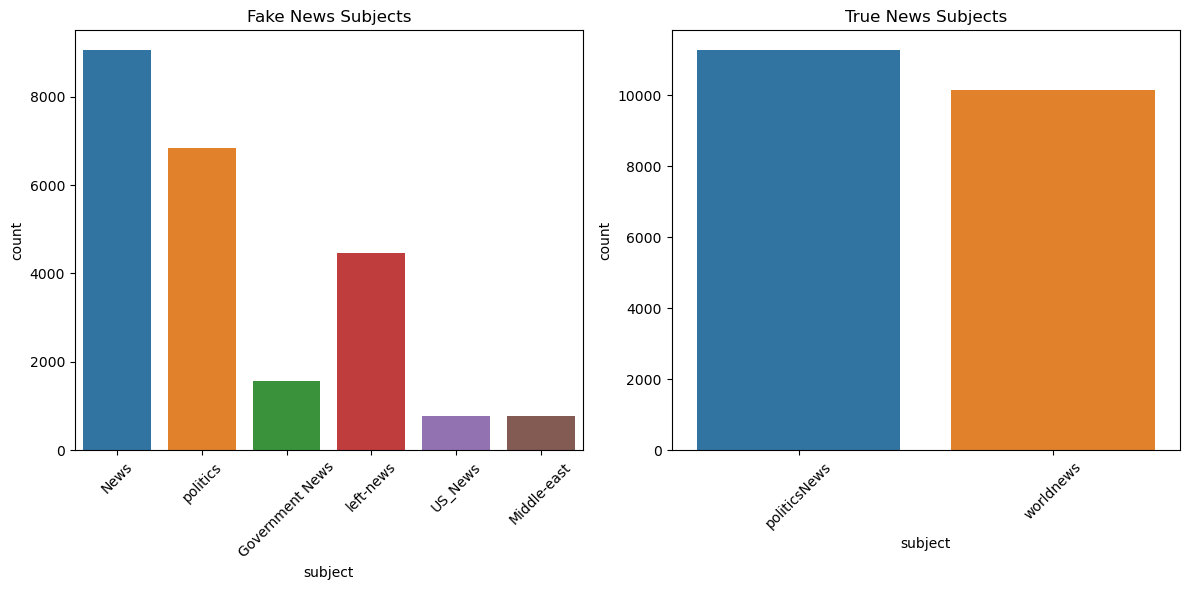

In [13]:
# Data Visualization
# Distribution of subjects
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='subject', data=fake_news)
plt.title('Fake News Subjects')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.countplot(x='subject', data=true_news)
plt.title('True News Subjects')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Top words in Fake and True News
def plot_top_words(texts, title):
    all_text = ' '.join(texts)
    word_counts = Counter(all_text.split())
    common_words = dict(word_counts.most_common(20))  # Change number of words as needed
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(common_words.values()), y=list(common_words.keys()), palette='viridis')
    plt.title(title)
    plt.xlabel('Word Count')
    plt.ylabel('Words')
    plt.show()

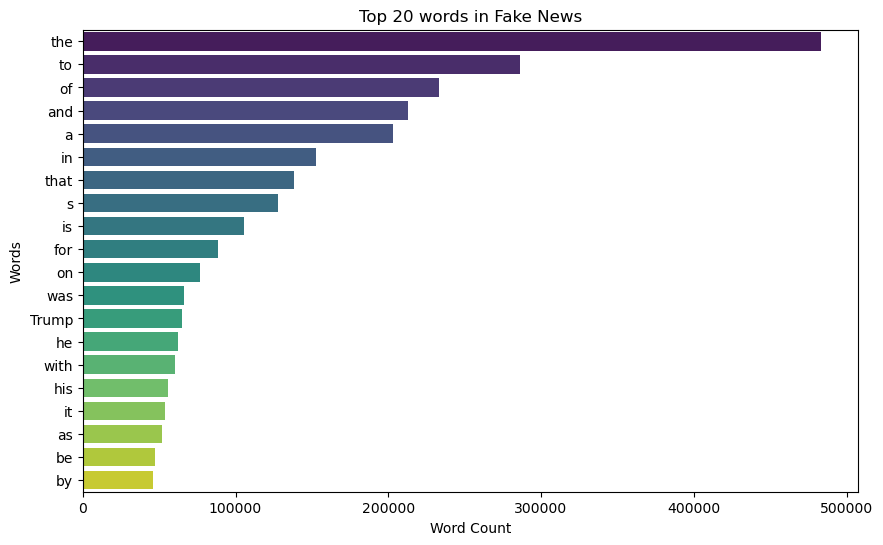

In [17]:
plot_top_words(fake_news['text'], 'Top 20 words in Fake News')

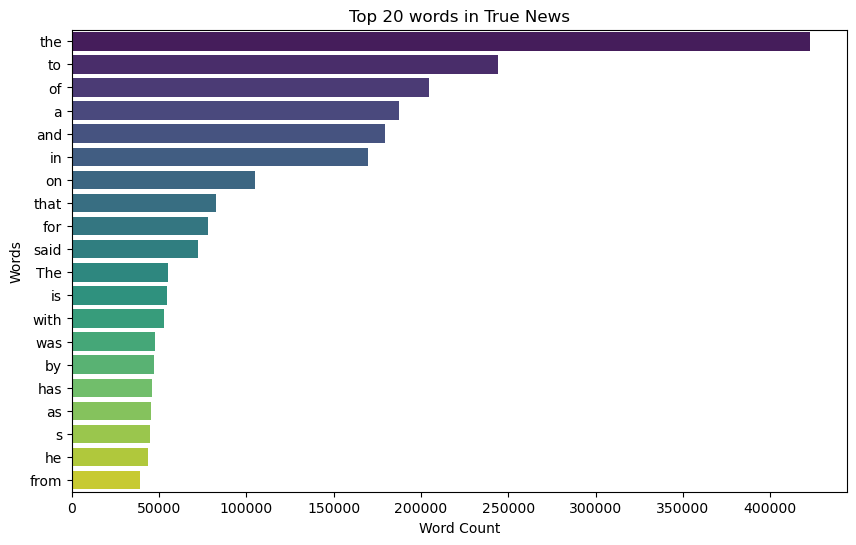

In [18]:
plot_top_words(true_news['text'], 'Top 20 words in True News')

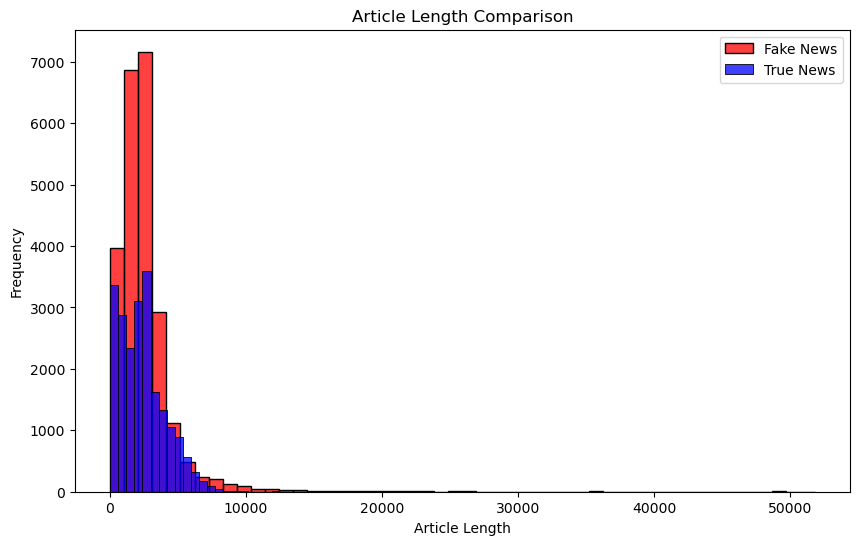

In [20]:
# Visualization 3: Article Length Comparison
fake_news['article_length'] = fake_news['text'].apply(len)
true_news['article_length'] = true_news['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(fake_news['article_length'], bins=50, color='red', label='Fake News')
sns.histplot(true_news['article_length'], bins=50, color='blue', label='True News')
plt.title('Article Length Comparison')
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [21]:
# Splitting the data into training and testing sets
# For simplicity, let's assume we're using just the 'text' column as feature and 'subject' as target
X = pd.concat([fake_news['text'], true_news['text']])
y = pd.concat([pd.Series(['fake']*len(fake_news)), pd.Series(['true']*len(true_news))])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Building and evaluating a simple predictive model (example using Multinomial Naive Bayes)
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [23]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of the Multinomial Naive Bayes model:", accuracy)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of the Multinomial Naive Bayes model: 0.9359688195991092

Confusion Matrix:
[[4494  239]
 [ 336 3911]]

Classification Report:
              precision    recall  f1-score   support

        fake       0.93      0.95      0.94      4733
        true       0.94      0.92      0.93      4247

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

